In [1]:
# Importing modules
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

### Load data

In [2]:
song_data = pd.read_csv('~/Documents/JADS-Premaster/Machine--Learning--JADS/machine_learning_group_7/song_data.csv')
song_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### Check null values

In [4]:
song_data.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [5]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


### Overall exploration
- Overview of distrubition of variables
- Overview of types of variables

In [6]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


array([[<AxesSubplot:title={'center':'song_popularity'}>,
        <AxesSubplot:title={'center':'song_duration_ms'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'audio_mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

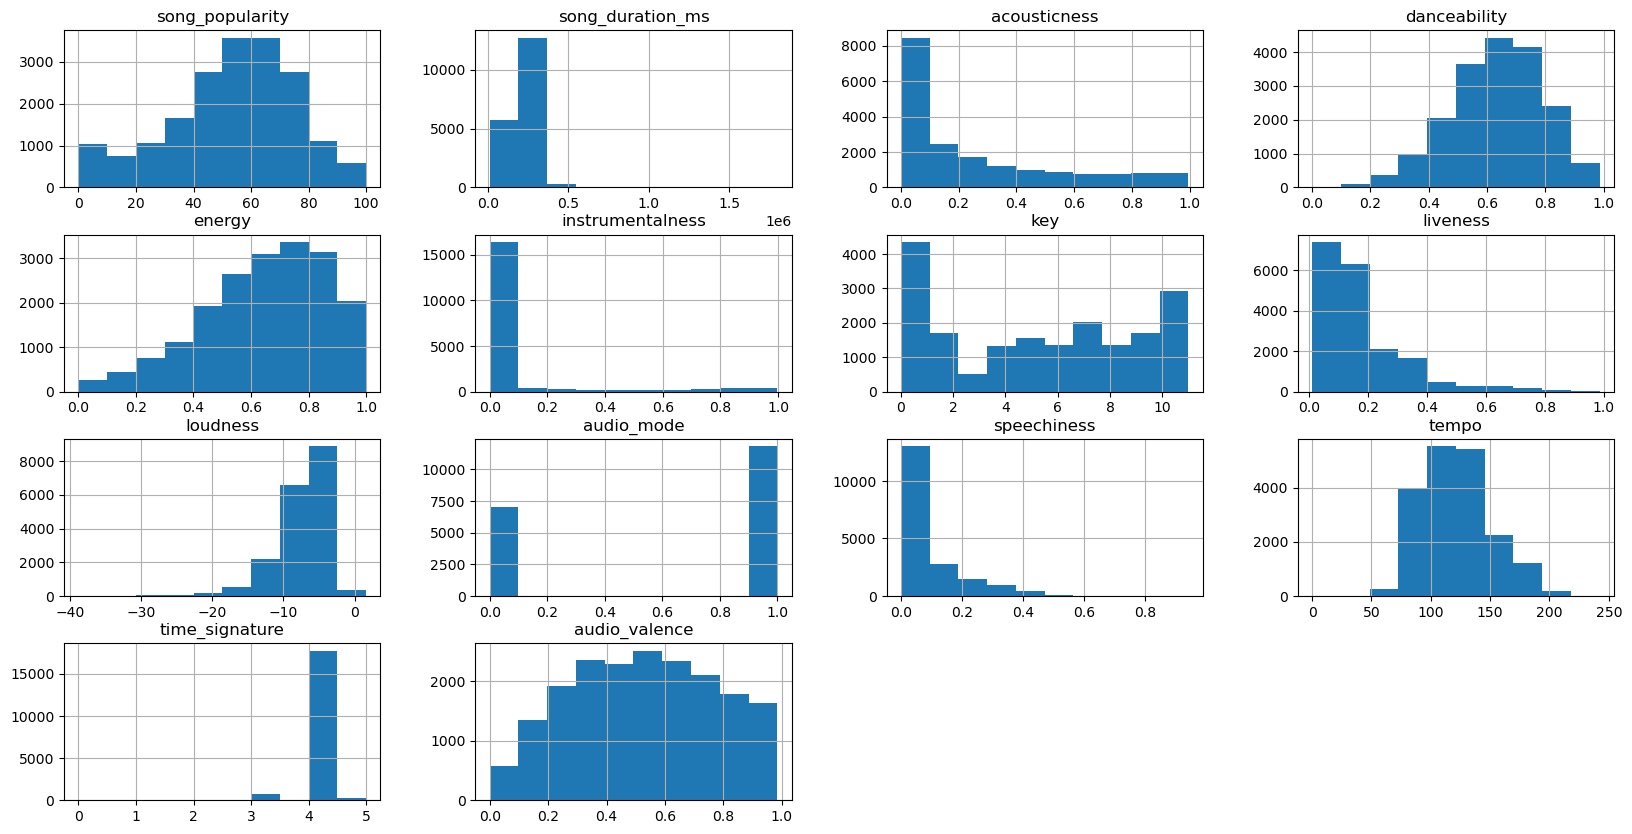

In [7]:
song_data.hist(figsize = (20, 10) )

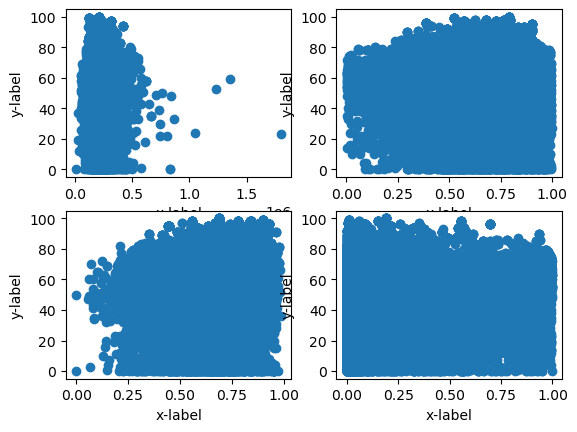

In [8]:

fig, axs = plt.subplots(2, 2)

y = song_data['song_popularity']

axs[0, 0].scatter(song_data['song_duration_ms'], y)
# axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].scatter(song_data['energy'], y)
# axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].scatter(song_data['danceability'], y)
# axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].scatter(song_data['acousticness'], y)


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

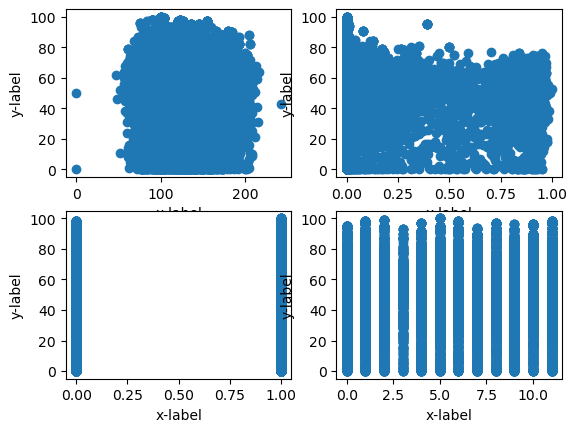

In [9]:
fig, axs = plt.subplots(2, 2)

y = song_data['song_popularity']

axs[0, 0].scatter(song_data['tempo'], y)
# axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].scatter(song_data['instrumentalness'], y)
# axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].scatter(song_data['audio_mode'], y)
# axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].scatter(song_data['key'], y)
# axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

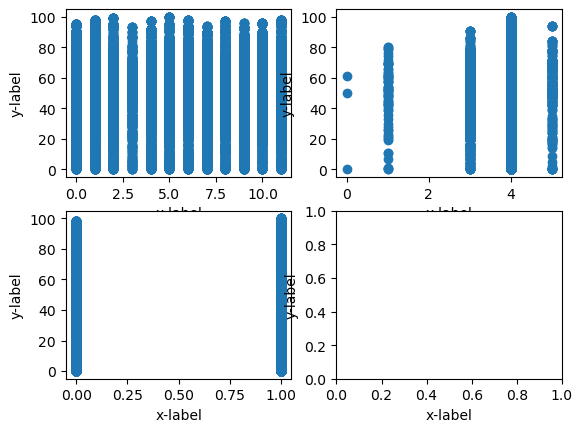

In [10]:
fig, axs = plt.subplots(2, 2)

y = song_data['song_popularity']

axs[0, 0].scatter(song_data['key'], y)
# axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].scatter(song_data['time_signature'], y)
# axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].scatter(song_data['audio_mode'], y)
# axs[1, 0].set_title('Axis [1, 0]')
#axs[1, 1].scatter(song_data[''], y)
# axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

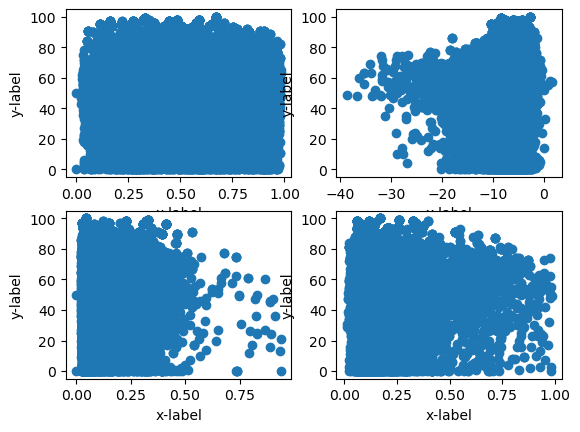

In [11]:
fig, axs = plt.subplots(2, 2)

y = song_data['song_popularity']

axs[0, 0].scatter(song_data['audio_valence'], y)
# axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].scatter(song_data['loudness'], y)
# axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].scatter(song_data['speechiness'], y)
# axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].scatter(song_data['liveness'], y)
# axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

In these histograms we can visualize the distribution of the data. Interesting is song_duration_ms. This might contain outliers. We will check for them. 

In [12]:
song_data.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

## DATA CLEANING

### Duplicates
Check for duplicates and if so, delete duplicates and keep first value

In [13]:
duplicate_rows = song_data[song_data.duplicated(['song_name'])].sort_values('song_name')
len(duplicate_rows)

# As we can see below, there is quite some duplicate data; +5000 values

5765

In [14]:
print(len(song_data))
# Double check for duplicate values
print(song_data.loc[song_data['song_name'].isin(["'Till I Collapse"])])

18835
              song_name  song_popularity  song_duration_ms  acousticness  \
9732   'Till I Collapse               85            297893        0.0757   
13859  'Till I Collapse               85            297893        0.0757   
17260  'Till I Collapse               85            297893        0.0757   

       danceability  energy  instrumentalness  key  liveness  loudness  \
9732          0.572   0.853               0.0    1    0.0798    -3.203   
13859         0.572   0.853               0.0    1    0.0798    -3.203   
17260         0.572   0.853               0.0    1    0.0798    -3.203   

       audio_mode  speechiness    tempo  time_signature  audio_valence  
9732            1        0.217  171.297               4          0.102  
13859           1        0.217  171.297               4          0.102  
17260           1        0.217  171.297               4          0.102  


In [15]:
removed_duplicates = song_data.drop_duplicates(keep='first').sort_values('song_name')
removed_duplicates

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
16726,"""40"" - Live Version 1983",1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286
14132,"""45""",48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423
14990,"""99""",67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714
2198,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584
12160,#CaixaGang,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,通過驗證,40,217981,0.377000,0.730,0.809,0.000000,4,0.0821,-5.550,0,0.1690,108.957,4,0.516
4513,都市森林,24,210742,0.194000,0.612,0.536,0.000000,10,0.1250,-12.150,0,0.2490,164.058,4,0.386
9886,비상연락음,37,181285,0.743000,0.430,0.874,0.000000,8,0.4250,-4.571,1,0.2700,140.945,4,0.391
6694,빨간 맛 Red Flavor,72,191139,0.040900,0.709,0.917,0.000000,9,0.0839,-3.315,1,0.1890,125.042,4,0.515


In [16]:
print(len(removed_duplicates))

14926


In [17]:
removed_duplicates.shape

(14926, 15)

In [18]:
print(removed_duplicates.loc[removed_duplicates['song_name'].isin(["'Till I Collapse"])])
# We now see that all duplicates have been deleted

             song_name  song_popularity  song_duration_ms  acousticness  \
9732  'Till I Collapse               85            297893        0.0757   

      danceability  energy  instrumentalness  key  liveness  loudness  \
9732         0.572   0.853               0.0    1    0.0798    -3.203   

      audio_mode  speechiness    tempo  time_signature  audio_valence  
9732           1        0.217  171.297               4          0.102  


### Look for outliers

1 - Using the Z score we determine outliers by considereing ranges outside the 3rd standard deviation
Or 2 - we could use the IQR(inter quantile range) which is the difference of the 75 percentile value and 25 percentile value

## Using Z score
Z score = (Observation - Mean) / standard deviation

We will consider 3 as the threshold since values after the 3rd standard deviation are somewhat insignificant

In [19]:
removed_duplicates['Zscore'] = (removed_duplicates.song_duration_ms - removed_duplicates.song_duration_ms.mean()) / removed_duplicates.song_duration_ms.std()
removed_duplicates.head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Zscore
16726,"""40"" - Live Version 1983",1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286,0.104112
14132,"""45""",48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423,-0.263978
14990,"""99""",67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714,-0.313384
2198,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584,-0.082395
12160,#CaixaGang,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542,-0.167877


In [20]:
removed_duplicates[removed_duplicates['Zscore'] < -3]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Zscore
7119,Gina Rodriguez - Latinos Trending Intro,0,12000,0.700,0.000,0.493,0.00,7,0.457,-6.102,1,0.0000,0.000,0,0.0000,-3.319649
3726,Thank You,19,31373,0.355,0.273,0.846,0.00,7,0.940,-15.659,1,0.0990,101.644,4,0.0326,-3.008889
18060,The Avengers,37,26186,0.196,0.365,0.275,0.96,9,0.065,-13.654,1,0.0738,84.388,4,0.0846,-3.092093


In [21]:
removed_duplicates[removed_duplicates['Zscore'] > 3]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Zscore
3733,1960 What?,22,747222,0.5150,0.511,0.505,0.000063,3,0.1140,-10.773,1,0.0421,119.292,4,0.622,8.473943
10204,2/3's Adventure,50,505323,0.6560,0.477,0.721,0.045100,0,0.6290,-7.192,0,0.0523,116.277,4,0.636,4.593676
479,2112: Overture / The Temples Of Syrinx / Disco...,53,1233666,0.0787,0.345,0.795,0.001650,2,0.1800,-7.440,1,0.1080,134.141,4,0.189,16.276923
6225,47 - Remix,70,517809,0.2480,0.711,0.699,0.000000,6,0.2540,-4.891,1,0.1930,146.016,4,0.376,4.793962
10815,6 Degrees (feat. Fiora) - Tale Of Us Remix,17,473550,0.1280,0.801,0.472,0.381000,4,0.1030,-9.948,1,0.0770,120.005,4,0.467,4.084009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,"Wu Tang Forever (ft. Ghostface Killah, Raekwon...",79,487960,0.1460,0.703,0.807,0.000000,1,0.3790,-4.936,1,0.3150,90.933,4,0.768,4.315158
13240,Yaavar,20,480920,0.8970,0.295,0.370,0.016400,10,0.1170,-11.523,0,0.0345,138.124,3,0.218,4.202230
10205,Yeah!,48,446040,0.4540,0.646,0.533,0.007630,8,0.0973,-11.824,0,0.0831,103.719,4,0.845,3.642725
6133,You And Me - Naturalize Remix,35,427874,0.1030,0.752,0.798,0.805000,11,0.1130,-8.383,0,0.0439,139.989,4,0.740,3.351327


In [22]:
all_outliers = removed_duplicates[(removed_duplicates.Zscore > 3) | (removed_duplicates.Zscore < -3)]
all_outliers

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Zscore
3733,1960 What?,22,747222,0.5150,0.511,0.505,0.000063,3,0.1140,-10.773,1,0.0421,119.292,4,0.622,8.473943
10204,2/3's Adventure,50,505323,0.6560,0.477,0.721,0.045100,0,0.6290,-7.192,0,0.0523,116.277,4,0.636,4.593676
479,2112: Overture / The Temples Of Syrinx / Disco...,53,1233666,0.0787,0.345,0.795,0.001650,2,0.1800,-7.440,1,0.1080,134.141,4,0.189,16.276923
6225,47 - Remix,70,517809,0.2480,0.711,0.699,0.000000,6,0.2540,-4.891,1,0.1930,146.016,4,0.376,4.793962
10815,6 Degrees (feat. Fiora) - Tale Of Us Remix,17,473550,0.1280,0.801,0.472,0.381000,4,0.1030,-9.948,1,0.0770,120.005,4,0.467,4.084009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,"Wu Tang Forever (ft. Ghostface Killah, Raekwon...",79,487960,0.1460,0.703,0.807,0.000000,1,0.3790,-4.936,1,0.3150,90.933,4,0.768,4.315158
13240,Yaavar,20,480920,0.8970,0.295,0.370,0.016400,10,0.1170,-11.523,0,0.0345,138.124,3,0.218,4.202230
10205,Yeah!,48,446040,0.4540,0.646,0.533,0.007630,8,0.0973,-11.824,0,0.0831,103.719,4,0.845,3.642725
6133,You And Me - Naturalize Remix,35,427874,0.1030,0.752,0.798,0.805000,11,0.1130,-8.383,0,0.0439,139.989,4,0.740,3.351327


In [23]:
cleaned_data = removed_duplicates[(removed_duplicates.Zscore > -3) & (removed_duplicates.Zscore < 3)]
cleaned_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Zscore
16726,"""40"" - Live Version 1983",1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286,0.104112
14132,"""45""",48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423,-0.263978
14990,"""99""",67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714,-0.313384
2198,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584,-0.082395
12160,#CaixaGang,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542,-0.167877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,通過驗證,40,217981,0.377000,0.730,0.809,0.000000,4,0.0821,-5.550,0,0.1690,108.957,4,0.516,-0.015537
4513,都市森林,24,210742,0.194000,0.612,0.536,0.000000,10,0.1250,-12.150,0,0.2490,164.058,4,0.386,-0.131657
9886,비상연락음,37,181285,0.743000,0.430,0.874,0.000000,8,0.4250,-4.571,1,0.2700,140.945,4,0.391,-0.604172
6694,빨간 맛 Red Flavor,72,191139,0.040900,0.709,0.917,0.000000,9,0.0839,-3.315,1,0.1890,125.042,4,0.515,-0.446106


In [24]:
cleaned_data = cleaned_data.drop(columns = ['Zscore'])
cleaned_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
16726,"""40"" - Live Version 1983",1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286
14132,"""45""",48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423
14990,"""99""",67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714
2198,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584
12160,#CaixaGang,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,通過驗證,40,217981,0.377000,0.730,0.809,0.000000,4,0.0821,-5.550,0,0.1690,108.957,4,0.516
4513,都市森林,24,210742,0.194000,0.612,0.536,0.000000,10,0.1250,-12.150,0,0.2490,164.058,4,0.386
9886,비상연락음,37,181285,0.743000,0.430,0.874,0.000000,8,0.4250,-4.571,1,0.2700,140.945,4,0.391
6694,빨간 맛 Red Flavor,72,191139,0.040900,0.709,0.917,0.000000,9,0.0839,-3.315,1,0.1890,125.042,4,0.515


In [25]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14740 entries, 16726 to 6684
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14740 non-null  object 
 1   song_popularity   14740 non-null  int64  
 2   song_duration_ms  14740 non-null  int64  
 3   acousticness      14740 non-null  float64
 4   danceability      14740 non-null  float64
 5   energy            14740 non-null  float64
 6   instrumentalness  14740 non-null  float64
 7   key               14740 non-null  int64  
 8   liveness          14740 non-null  float64
 9   loudness          14740 non-null  float64
 10  audio_mode        14740 non-null  int64  
 11  speechiness       14740 non-null  float64
 12  tempo             14740 non-null  float64
 13  time_signature    14740 non-null  int64  
 14  audio_valence     14740 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.8+ MB


In [26]:
print(len(cleaned_data))
print(len(all_outliers), 'outliers were dropped')
print(len(duplicate_rows), 'duplicate rows were dropped')
print('The dataset has a remaning ', len(cleaned_data), 'values')

14740
186 outliers were dropped
5765 duplicate rows were dropped
The dataset has a remaning  14740 values


## CATEGORICAL VARIABLES

In [27]:
cleaned_data['time_signature'].value_counts()

4    13809
3      670
5      193
1       66
0        2
Name: time_signature, dtype: int64

In [28]:
cleaned_data['key'].value_counts()

0     1713
7     1630
1     1580
9     1389
2     1375
5     1248
11    1202
4     1074
6     1041
8     1037
10    1028
3      423
Name: key, dtype: int64

### Conclusion of cleaned dataset
- Does all data makes sense?
- Does the data follow the appropriate rules for its field?
- Does it prove or disprove our working theory, or does it bring any insights to light?
- Can we find trends in data to help form the next theory?
    - If not, quality issue?
    

## WE VIEW THE TOP 20 SONGS TO HAVE A CLEARER VIEW INTO WHAT MOST PEOPLE LIKE ACCORDING TO THE DATASET

                                 Numeric Features Distribution                                  


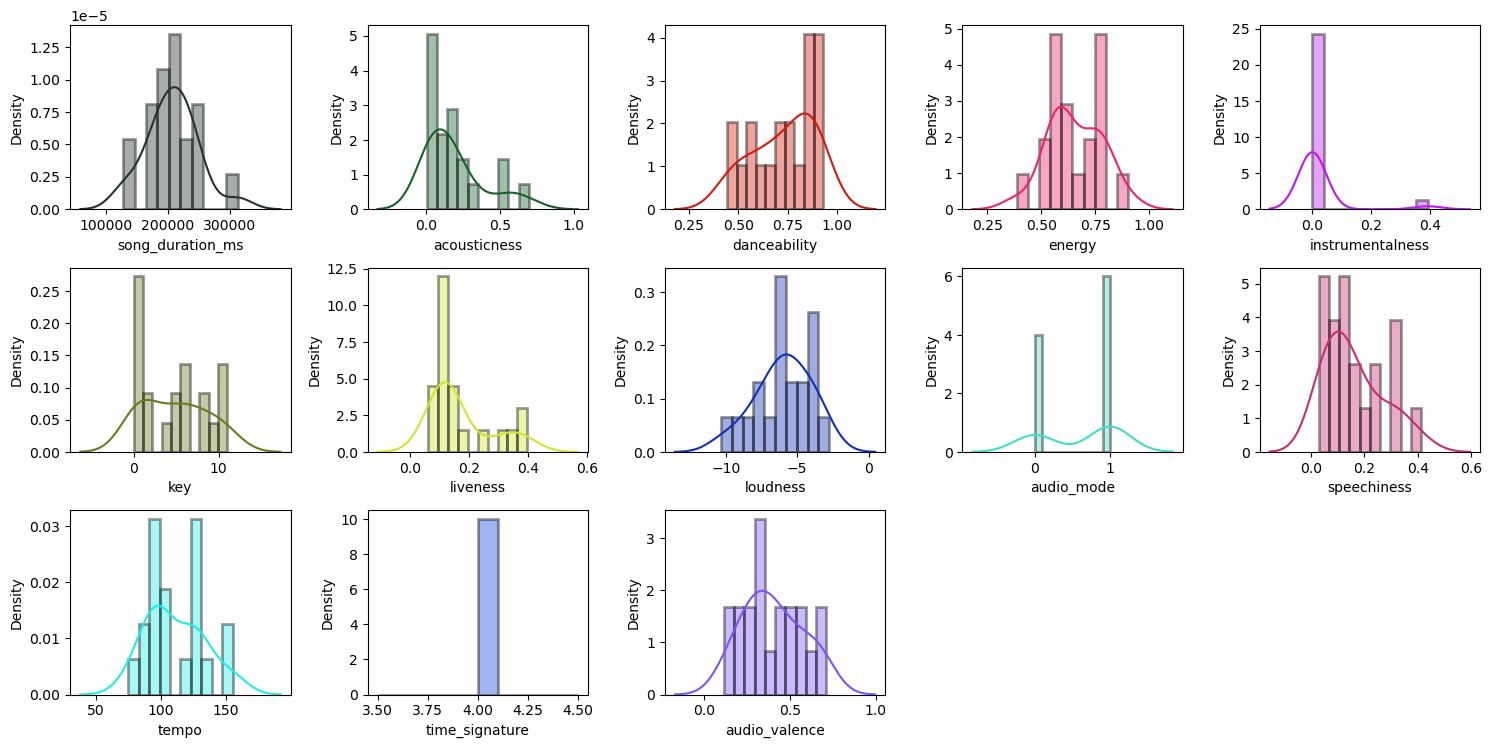

In [29]:
import math
import seaborn as sns
top_20_songs = cleaned_data.sort_values('song_popularity', ascending=False).copy().head(20)

print('\033[1mNumeric Features Distribution'.center(100))

n = 5
cols = top_20_songs.columns.tolist()[2:]
n_col = len(cols)

clr = ['r', 'g', 'b', 'g', 'b', 'r']

plt.figure(figsize=[15, 4 * math.ceil(n_col / n)])

for i in range(n_col):
    plt.subplot(math.ceil(n_col / 3), n, i + 1)
    sns.distplot(top_20_songs[cols[i]], hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255, 255, 255])/255))

plt.tight_layout()
plt.show()

### Set song_name as index

In [30]:
cleaned_data.set_index("song_name", inplace=True)
cleaned_data

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
"""40"" - Live Version 1983",1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286
"""45""",48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423
"""99""",67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714
"""Heroes"" - Single Version; 2014 Remastered Version",58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584
#CaixaGang,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
通過驗證,40,217981,0.377000,0.730,0.809,0.000000,4,0.0821,-5.550,0,0.1690,108.957,4,0.516
都市森林,24,210742,0.194000,0.612,0.536,0.000000,10,0.1250,-12.150,0,0.2490,164.058,4,0.386
비상연락음,37,181285,0.743000,0.430,0.874,0.000000,8,0.4250,-4.571,1,0.2700,140.945,4,0.391


### Make dummy variables
We encode categorial features: key and time_signature

In [31]:
import pandas as pd
encoded_data = pd.get_dummies(cleaned_data, columns = ['key', 'time_signature'], drop_first = True, dtype = int)

In [32]:
encoded_data

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
song_name,,,,,,,,,,,,,,,,,,,,,
"""40"" - Live Version 1983",1,225440,0.109000,0.257,0.472,0.000945,0.8290,-16.259,1,0.0399,...,0,0,1,0,0,0,0,0,1,0
"""45""",48,202493,0.000696,0.315,0.970,0.000000,0.2770,-4.709,1,0.1020,...,0,0,1,0,0,0,0,0,1,0
"""99""",67,199413,0.005980,0.552,0.804,0.000000,0.1110,-4.299,1,0.0303,...,0,0,1,0,0,0,0,0,1,0
"""Heroes"" - Single Version; 2014 Remastered Version",58,213813,0.016000,0.502,0.681,0.107000,0.1020,-8.263,1,0.0276,...,0,1,0,0,0,0,0,0,1,0
#CaixaGang,10,208484,0.612000,0.697,0.907,0.282000,0.0624,-5.130,1,0.0920,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
通過驗證,40,217981,0.377000,0.730,0.809,0.000000,0.0821,-5.550,0,0.1690,...,0,0,0,0,0,0,0,0,1,0
都市森林,24,210742,0.194000,0.612,0.536,0.000000,0.1250,-12.150,0,0.2490,...,0,0,0,0,1,0,0,0,1,0
비상연락음,37,181285,0.743000,0.430,0.874,0.000000,0.4250,-4.571,1,0.2700,...,0,0,1,0,0,0,0,0,1,0


In [33]:
print(encoded_data.columns)

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'audio_valence', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')


### Give multiclass for popularity

Split our target variable into categories: Unpopular, Moderate, Popular for classification

In [34]:
import numpy as np
percentile_value_one_third = np.percentile(encoded_data['song_popularity'], 100/3)
percentile_value_two_third = np.percentile(encoded_data['song_popularity'], 100/3 * 2)
percentile_value_three_third = np.percentile(encoded_data['song_popularity'], 100/3 * 3)
print('The first one third lies at', percentile_value_one_third)
print('The two third lies at', percentile_value_two_third)
print('The last third lies at', percentile_value_three_third)
# pd.cut(encoded_data.song_popularity, bins=[0,35,66,100], labels=['low popularity', 'moderately popular', 'popular'])


The first one third lies at 43.0
The two third lies at 59.0
The last third lies at 100.0


In [35]:
# sns.displot(encoded_data, x = 'song_popularity', kde = True)
# plt.axvline(x = percentile_value_one_third, color = 'r')
# plt.axvline(x = percentile_value_two_third, color = 'r')
# plt.show()

In [36]:
popularity = []
for row in encoded_data['song_popularity']:
    if row <= percentile_value_one_third: popularity.append('unpopular')
    elif 43 < row <= percentile_value_two_third: popularity.append('moderate')
    else: popularity.append('popular')
        
encoded_data['popularity'] = popularity
classification_data = encoded_data.drop(columns = ['song_popularity'])
classification_data

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,popularity
song_name,,,,,,,,,,,,,,,,,,,,,
"""40"" - Live Version 1983",225440,0.109000,0.257,0.472,0.000945,0.8290,-16.259,1,0.0399,143.517,...,0,1,0,0,0,0,0,1,0,unpopular
"""45""",202493,0.000696,0.315,0.970,0.000000,0.2770,-4.709,1,0.1020,178.068,...,0,1,0,0,0,0,0,1,0,moderate
"""99""",199413,0.005980,0.552,0.804,0.000000,0.1110,-4.299,1,0.0303,95.980,...,0,1,0,0,0,0,0,1,0,popular
"""Heroes"" - Single Version; 2014 Remastered Version",213813,0.016000,0.502,0.681,0.107000,0.1020,-8.263,1,0.0276,112.160,...,1,0,0,0,0,0,0,1,0,moderate
#CaixaGang,208484,0.612000,0.697,0.907,0.282000,0.0624,-5.130,1,0.0920,98.953,...,0,0,0,0,0,0,0,1,0,unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
通過驗證,217981,0.377000,0.730,0.809,0.000000,0.0821,-5.550,0,0.1690,108.957,...,0,0,0,0,0,0,0,1,0,unpopular
都市森林,210742,0.194000,0.612,0.536,0.000000,0.1250,-12.150,0,0.2490,164.058,...,0,0,0,1,0,0,0,1,0,unpopular
비상연락음,181285,0.743000,0.430,0.874,0.000000,0.4250,-4.571,1,0.2700,140.945,...,0,1,0,0,0,0,0,1,0,unpopular


In [37]:
classification_data.corr()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
song_duration_ms,1.000000,-0.141862,-0.081719,0.115324,-0.083930,0.008841,0.065452,-0.030112,-0.092385,0.014629,...,0.009716,-0.001893,-0.015929,0.006981,-0.002808,-0.009020,-0.019661,0.006349,0.007525,-0.015360
acousticness,-0.141862,1.000000,-0.168930,-0.680744,0.186873,-0.088082,-0.573099,0.060603,-0.088292,-0.142529,...,-0.033344,0.004461,-0.007642,0.015895,0.029575,-0.051195,0.051292,0.195662,-0.194241,0.027559
danceability,-0.081719,-0.168930,1.000000,0.050912,-0.126538,-0.094045,0.170382,-0.097995,0.199835,-0.129989,...,0.017702,-0.023088,0.007803,-0.022937,0.014830,0.041304,-0.059170,-0.172789,0.195268,-0.064084
energy,0.115324,-0.680744,0.050912,1.000000,-0.227267,0.178546,0.767768,-0.049874,0.073049,0.182348,...,0.022967,-0.009322,0.019890,-0.001569,-0.018766,0.037196,-0.042373,-0.194718,0.195752,-0.036714
instrumentalness,-0.083930,0.186873,-0.126538,-0.227267,1.000000,-0.040978,-0.401452,-0.019048,-0.073804,-0.044388,...,0.004005,-0.005538,-0.007239,-0.015411,0.012922,-0.010040,0.041717,0.075692,-0.092271,0.032282
liveness,0.008841,-0.088082,-0.094045,0.178546,-0.040978,1.000000,0.114043,-0.003226,0.093150,0.026757,...,-0.002709,0.025362,-0.031650,-0.006055,-0.016386,0.012598,-0.007116,-0.023827,0.023481,-0.004548
loudness,0.065452,-0.573099,0.170382,0.767768,-0.401452,0.114043,1.000000,-0.056404,0.078988,0.141214,...,0.020063,-0.018172,0.027569,-0.009792,-0.017271,0.040028,-0.038116,-0.153106,0.156738,-0.032247
audio_mode,-0.030112,0.060603,-0.097995,-0.049874,-0.019048,-0.003226,-0.056404,1.000000,-0.112645,0.021078,...,-0.079751,0.092133,0.047486,-0.023721,-0.102742,-0.130080,0.008996,0.021185,-0.019860,-0.002516
speechiness,-0.092385,-0.088292,0.199835,0.073049,-0.073804,0.093150,0.078988,-0.112645,1.000000,0.057107,...,0.023113,-0.037702,0.029655,-0.019912,0.034240,0.041541,0.023606,-0.046239,-0.011824,0.095084
tempo,0.014629,-0.142529,-0.129989,0.182348,-0.044388,0.026757,0.141214,0.021078,0.057107,1.000000,...,-0.007267,0.001882,0.005266,0.008065,-0.007934,0.001392,-0.036782,0.027036,-0.008333,-0.008121


<AxesSubplot:>

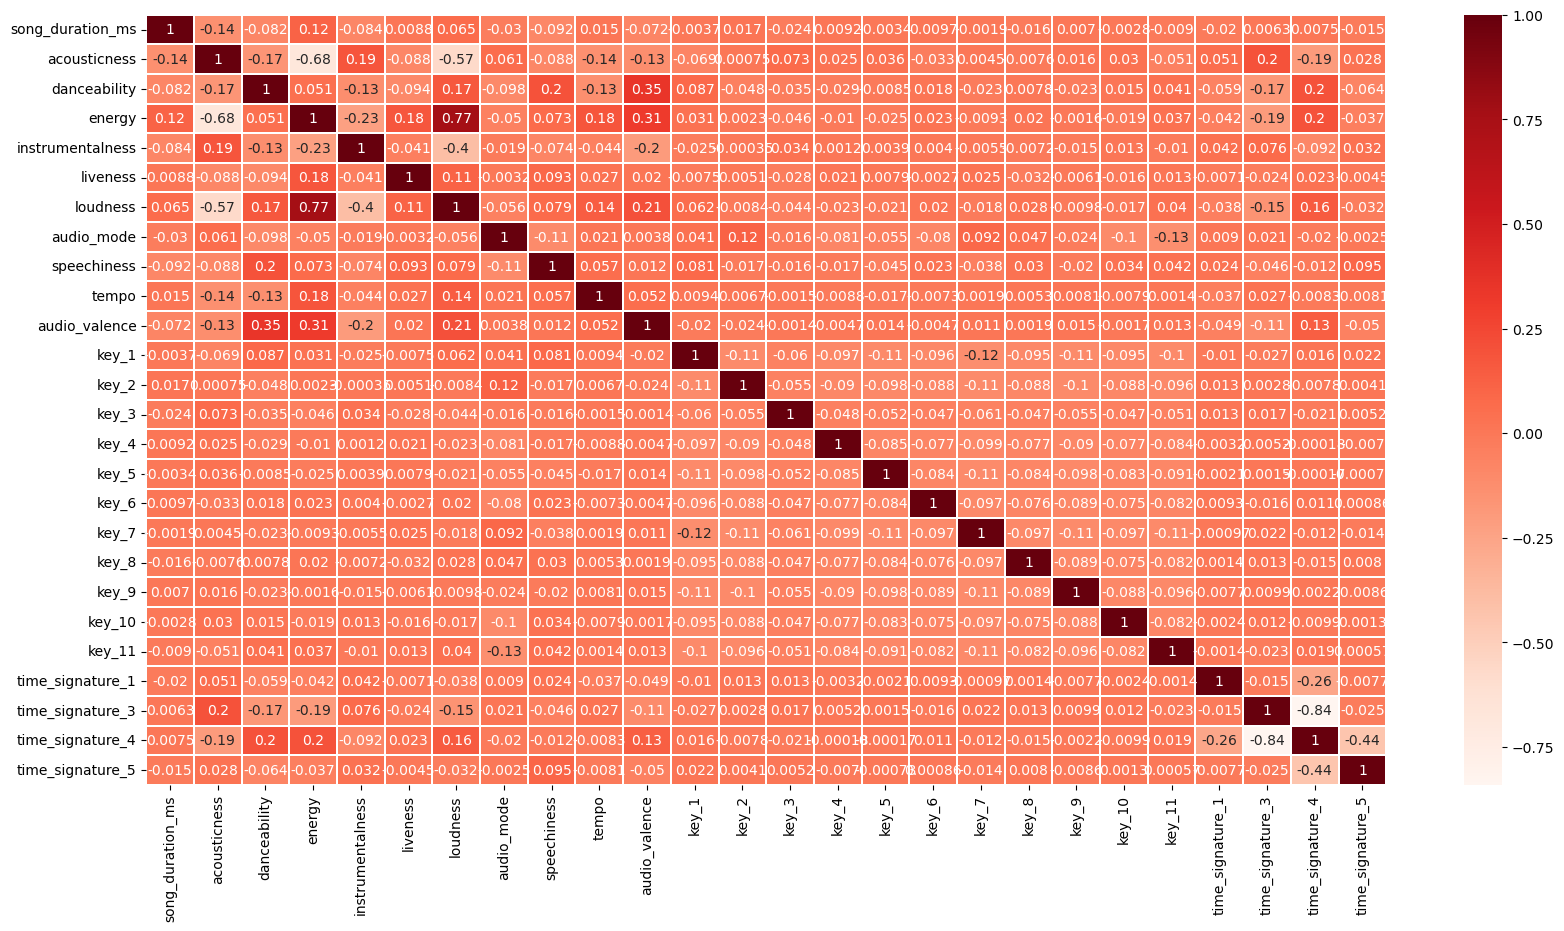

In [38]:
plt.figure(figsize = (20, 10))
cor = classification_data.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds, linewidths = 0.2)

## WE VIEW THE DISSTRIBUTION AGAIN AFTER ALL DATA TRANSFORMATION PROCESSES

## DECISION TREES - CLASSIFICATION

## CHECKING THE CLASS DISTRIBUTION 

In [39]:
class_counts = encoded_data['popularity'].value_counts()
class_counts

unpopular    4988
popular      4911
moderate     4841
Name: popularity, dtype: int64

In [40]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

## Split into Training and Testing set

In [41]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dt_clf = DecisionTreeClassifier(random_state = 42)
svm = SVC(random_state = 42)
knn = KNeighborsClassifier()

y = classification_data['popularity']
X = classification_data.drop(['popularity'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)
print(len(X_train), "train +", len(X_test), "test = ", (len(X_train)+ len(X_test)), 'values total')


10318 train + 4422 test =  14740 values total


In [42]:
# EVENLY DISTRIBUTED CLASS VALUES
y_test.value_counts()

unpopular    1497
popular      1473
moderate     1452
Name: popularity, dtype: int64

In [43]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [44]:
# THIS CELL RUNS FOR 3 MINUTES
fold = StratifiedKFold(n_splits = 5)
scaler = StandardScaler()

scores_dt = []
scores_knn = []
scores_svm = [] 

for train_index, test_index in fold.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scores_dt.append(get_score(dt_clf, X_train_scaled, X_test_scaled, y_train, y_test))
    scores_knn.append(get_score(knn, X_train_scaled, X_test_scaled, y_train, y_test))
    scores_svm.append(get_score(svm, X_train_scaled, X_test_scaled, y_train, y_test))
    


scores_dt

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe8e31e3ee0>
Traceback (most recent call last):
  File "/home/pedro/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/pedro/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/pedro/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/pedro/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

[0.36261872455902305,
 0.35278154681139756,
 0.3558344640434193,
 0.36974219810040704,
 0.36906377204884666]

In [46]:
scores_knn

[0.33344640434192674,
 0.33175033921302577,
 0.3229308005427408,
 0.3378561736770692,
 0.33548168249660787]

In [47]:
scores_svm

[0.41350067842605154,
 0.40705563093622793,
 0.3948439620081411,
 0.4080732700135685,
 0.42028493894165536]

In [ ]:
# WHILE THIS CELL TOOK 7 MINUTES
params = {
    'C': [1,2,3],
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree' : [1,2,3], 'coef0' : [1,2]
}



# create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm, param_distributions=params, cv=3, random_state = 42)

# fit the random search object
random_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

In [ ]:
best_svm_clf = random_search.best_estimator_
y_pred = best_svm_clf.predict(X_test_scaled, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,final_prediction), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
from sklearn.ensemble import BaggingClassifier
best_svm = random_search.best_estimator_['classification']
bag_clf = BaggingClassifier(best_svm, n_estimators=100, random_state=42)
bag_clf.fit(X_train_scaled, y_train)
y_pred = bag_clf.predict(X_test_scaled, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Bagging classifier accuracy:', accuracy)
print(classification_report(y_test, y_pred))

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,y_pred), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
X

In [ ]:
# THIS CELL RUNS FOR 18 MINUTES WHICH IS SUITABLE FOR THE PURPOSE OF OUR PROJECT
params = {
    'C': [1,2,3,4,5,6],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree' : [1,2,3], 'coef0' : [1,2,3]
}



# create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=params, scoring = 'accuracy', cv=5)

# fit the grid search object
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



pipe = Pipeline([('scaler', StandardScaler()),
                 ('classification', SVC(random_state = 42))])

pipe = pipe.fit(X_train, y_train)



params = {
    'C': [1,2,3,4,5,6],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree' : [1,2,3], 'coef0':[1,2,3,4]
}



# create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipe, param_distributions=params, scoring = 'accuracy', n_iter = 10, cv=5, random_state = 42)

# fit the random se arch object
random_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


In [ ]:
final_model = random_search.best_estimator_
X_test_transformed = final_model.named_steps['scaler'].transform(X_test)
X_test_transformed = final_model.named_steps['rfecv'].transform(X_test_transformed)
final_prediction = final_model.named_steps['classification'].predict(X_test_transformed)
accuracy = accuracy_score(y_test, final_prediction)
print('Accuracy:', accuracy)
print(classification_report(y_test, final_prediction))
print(confusion_matrix(y_test,final_prediction))

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,final_prediction), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
from sklearn.ensemble import BaggingClassifier
best_svm = random_search.best_estimator_['classification']
bag_clf = BaggingClassifier(best_svm, n_estimators=100, random_state=42)
bag_clf.fit(X_train_scaled, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Bagging classifier accuracy:', accuracy)
print(classification_report(y_test, y_pred))

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,y_pred), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
# Best parameters:{'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'coef0': 2, 'C': 3} to be used for the pipeline

from sklearn.pipeline import Pipeline
polynomial_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree = 2, coef0 = 1, C=6))])
polynomial_svm_clf.fit(X_train_scaled, y_train)
polynomial_svm_clf.score(X_test_scaled, y_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



pipe = Pipeline([('scaler', StandardScaler()),
                 ('rfecv', RFECV(dt_clf, scoring = 'accuracy')),
                 ('classification', DecisionTreeClassifier(random_state=42))])

pipe.fit(X_train, y_train)

param_dist = {'classification__criterion': ['gini', 'entropy'],
               'classification__max_depth': [3, 5, 7, 10, None],
               'classification__splitter': ['best', 'random'],
               'classification__min_samples_split': [2, 4, 5, 8, 10],
               'classification__min_samples_leaf': [1, 2, 4, 6, 8, 10, 13],
              'classification__max_features': [None, 'sqrt', 'log2']}


random_search = RandomizedSearchCV(estimator = pipe, param_distributions=param_dist, cv = 5,
                scoring='accuracy')

random_search.fit(X_train, y_train)

print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)



In [ ]:

final_model = random_search.best_estimator_
X_test_transformed = final_model.named_steps['scaler'].transform(X_test)
X_test_transformed = final_model.named_steps['rfecv'].transform(X_test_transformed)
final_prediction = final_model.named_steps['classification'].predict(X_test_transformed)
accuracy = accuracy_score(y_test, final_prediction)
print('Accuracy:', accuracy)
print(classification_report(y_test, final_prediction))
print(confusion_matrix(y_test,final_prediction))

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,final_prediction), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
# WE CHECK FOR THE LEAST SIGNIFICANT VARIABLE AND ELIMINATE IT

rfecv = RFECV(estimator=dt_clf, step=1, cv=5, scoring='accuracy')
rfecv.fit_transform(X_train, y_train)
#rfecv.transform(X_train)

print('Optimal number of features:', rfecv.n_features_)
print('Selected features:', rfecv.support_)
print('Feature names:', rfecv.feature_names_in_)
print('Feature ranking:', rfecv.ranking_)



In [ ]:

import seaborn as sns

feature_importance = pd.DataFrame(rfecv.feature_importances_, index = X.columns, columns = ['importance']).sort_values('importance', ascending = False)

plt.figure(figsize=(8, 6))
sns.barplot(x = feature_importance['importance'], y = feature_importance['importance'].index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)

# Highlight the optimal number of features selected
optimal_num_features = rfecv.n_features_
plt.axvline(x=optimal_num_features, color='r', linestyle='--')
plt.text(optimal_num_features + 0.5, np.max(rfecv.grid_scores_) - 0.1,
         f"Optimal number of features: {optimal_num_features}",
         rotation=90, fontsize=10, va='top', ha='center')

plt.show()


In [ ]:
# THIS IS TO VERIFY IF THE MODEL IS UNDERFITTING OR OVERFITTING
# IF THE ACCURACY IS LOW ON TRAIN AND TEST SET THEN IT IS UNDERFITTING(BIASED)
# IF IT PERFORMS WELL ON TRAINIG SET AND POOORLY ON TEST SET THEN IT IS OVERFITTING(LEARNING ALL THE PATTERNS FROM THE DATASET)

x_pred = rfecv.predict(X_train)
y_pred = rfecv.predict(X_test)
y_pred

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy on train set:', accuracy_score(y_train, x_pred))  #CHECK CLASSIFICATION ERROR RATE


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,y_pred), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
param_dist = {'criterion': ['gini', 'entropy'],
               'max_depth': [3, 5, 7, 10, None],
               'splitter': ['best', 'random'],
               'min_samples_split': [2, 4, 5, 8, 10],
               'min_samples_leaf': [1, 2, 4, 6, 8, 10, 13],
              'max_features': [None, 'sqrt', 'log2']}


random_search = RandomizedSearchCV(estimator = dt_clf, param_distributions=param_dist, n_iter = 10, cv = 5, random_state = 42,
                scoring='accuracy')
random_search.fit(X_train, y_train)

print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

In [ ]:
random_search.cv_results_

In [ ]:
best_clf = DecisionTreeClassifier(**random_search.best_params_)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,y_pred), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(**random_search.best_params_), n_estimators=100, random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Bagging classifier accuracy:', accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,y_pred), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## CAN IT GET BETTER?
I TRIED USING THE BOOTSTRAP AGGREGATING (BAGGING) CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier
best_dt_clf = random_search.best_estimator_['classification']
bag_clf = BaggingClassifier(best_dt_clf, n_estimators=100, random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Bagging classifier accuracy:', accuracy)

In [ ]:
target_names = ['moderate', 'popular', 'unpopular']
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test,y_pred), xticklabels = target_names, yticklabels = target_names, annot = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler



# pipe = Pipeline([('scaler', StandardScaler()),
#                  ('Recursive feature elimination', RFECV(dt_clf, scoring = 'accuracy')),
#                  ('classification', DecisionTreeClassifier(random_state=42))])

# param_dist = {'classification__criterion': ['gini', 'entropy'],
#                'classification__max_depth': [3, 5, 7, 10, None],
#                'classification__splitter': ['best', 'random'],
#                'classification__min_samples_split': [2, 4, 5, 8, 10],
#                'classification__min_samples_leaf': [1, 2, 4, 6, 8, 10, 13],
#               'classification__max_features': [None, 'sqrt', 'log2']}


# grid_search = GridSearchCV(estimator = pipe, param_grid=param_dist, cv = 5,
#                 scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print('Best hyperparameters:', grid_search.best_params_)
# print('Best score:', grid_search.best_score_)

# scoring = ['f1_micro', 'precision_micro', 'recall_micro']
# cv_results = cross_val_score(estimator=pipe, 
#                             X=X_train, y=y_train, cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5,random_state=42),
#                       scoring=scoring)

# print(np.mean(cv_results['test_f1_micro']))
# print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
# print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
# print(np.mean(cv_results['test_precision_micro']))
# print(np.mean(cv_results['test_recall_micro']))

In [ ]:

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv.grid_scores_)), rfecv.grid_scores_)

# Highlight the optimal number of features selected
optimal_num_features = rfecv.n_features_
plt.axvline(x=optimal_num_features, color='r', linestyle='--')
plt.text(optimal_num_features + 0.5, np.max(rfecv.grid_scores_) - 0.1,
         f"Optimal number of features: {optimal_num_features}",
         rotation=90, fontsize=10, va='top', ha='center')

plt.show()


In [ ]:
# WE CHECK FOR THE LEAST SIGNIFICANT VARIABLE AND ELIMINATE IT

rfecv = RFECV(estimator=dt_clf, step=1, cv=5, scoring='accuracy')
rfecv.fit_transform(X_train, y_train)
#rfecv.transform(X_train)

print('Optimal number of features:', rfecv.n_features_)
print('Selected features:', rfecv.support_)
print('Feature names:', rfecv.feature_names_in_)
print('Feature ranking:', rfecv.ranking_)

# THE OPTIMAL NUMBER OF FEATURES WITH CV=5 IS 12 

In [ ]:
# plt.rc("figure", figsize=(8, 5))
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("CV score (of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [ ]:

# import seaborn as sns

# feature_importance = pd.DataFrame(dt_clf.feature_importances_, index = X.columns, columns = ['importance']).sort_values('importance', ascending = False)

# plt.figure(figsize=(8, 6))
# sns.barplot(x = feature_importance['importance'], y = feature_importance['importance'].index)
# plt.xlabel('Feature importance score')
# plt.ylabel('Features')
# plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.title('Recursive Feature Elimination with Cross-Validation')
# plt.xlabel('Number of Features')
# plt.ylabel('Feature Selection')
# plt.plot(range(1, len(rfecv.support_) + 1), rfecv.support_)
# plt.show()

In [ ]:
cv_results

In [ ]:
# THIS IS TO VERIFY IF THE MODEL IS UNDERFITTING OR OVERFITTING
# IF THE ACCURACY IS LOW ON TRAIN AND TEST SET THEN IT IS UNDERFITTING(BIASED)
# IF IT PERFORMS WELL ON TRAINIG SET AND POOORLY ON TEST SET THEN IT IS OVERFITTING(LEARNING ALL THE PATTERNS FROM THE DATASET)

x_pred = dt_clf.predict(X_train)
y_pred = dt_clf.predict(X_test)
y_pred

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')
# f1 = f1_score(y_test, y_pred, average='macro')
# print('Accuracy:', accuracy)
# print('Precision:', precision)
# print('Recall:', recall)
# print('F1-score:', f1)
# print('Accuracy on train set:', accuracy_score(y_train, x_pred))  #CHECK CLASSIFICATION ERROR RATE

## THE RECURSIVE FEATURE SELECTION HAD LITTLE IMPACT IN IMPROVING THE ACCURACY OF OUR MODEL
After tuning the hyperparameter(number of features to select), it produced a lower accuracy in our predictions possibly overfitting

In [ ]:
# param_dist = {'criterion': ['gini', 'entropy'],
#                'max_depth': [3, 5, 7, 10, None],
#                'splitter': ['best', 'random'],
#                'min_samples_split': [2, 4, 5, 8, 10],
#                'min_samples_leaf': [1, 2, 4, 6, 8, 10, 13],
#               'max_features': [None, 'sqrt', 'log2']}


# grid_search = GridSearchCV(estimator = dt_clf, param_distributions=param_dist, n_iter = 10, cv = 5, random_state = 42,
#                 scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print('Best hyperparameters:', grid_search.best_params_)
# print('Best score:', grid_search.best_score_)

## HENCE WE USE THE RANDOM SEARCH TO OPTIMIZE OUR PERFORMANCE

In [ ]:
# param_dist = {'criterion': ['gini', 'entropy'],
#                'max_depth': [3, 5, 7, 10, None],
#            #    'splitter': ['best', 'random'],
#                'min_samples_split': [2, 4, 5, 8, 10],
#                'min_samples_leaf': [1, 2, 4, 6, 8, 10, 13],
#               'max_features': [None, 'sqrt', 'log2']}


# random_search = RandomizedSearchCV(estimator = dt_clf, param_distributions=param_dist, n_iter = 10, cv = 5, random_state = 42,
#                 scoring='accuracy')
# random_search.fit(X_train, y_train)

# print('Best hyperparameters:', random_search.best_params_)
# print('Best score:', random_search.best_score_)

In [ ]:
# random_search.cv_results_

In [ ]:
# best_clf = DecisionTreeClassifier(**random_search.best_params_)
# best_clf.fit(X_train, y_train)
# y_pred = best_clf.predict(X_test)

In [ ]:
# print("Report : ",classification_report(y_test, y_pred))
# print("Accuracy:",accuracy_score(y_test, y_pred))
# print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

## CAN IT GET BETTER?
I TRIED USING THE BOOTSTRAP AGGREGATION (BAGGING) CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(**random_search.best_params_), n_estimators=100, random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Bagging classifier accuracy:', accuracy)

### Correlation

